# Deep inside: Autoencoders

4 types of autoencoders are described using the Keras framework and the MNIST dataset

1. Vanilla autoencoders
2. Multilayer autoencoder
3. Convolutional autoencoder
4. Regularized autoencoder

## Import the libraries

In [4]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Conv2DTranspose
from keras.utils import np_utils

## Load the data

We don't need the labels as the autoencoders are unsupervised network

In [5]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

## Normalize the data

In [6]:
type(X_train)

numpy.ndarray

We want the pixels values between 0 and 1 instead of between 0 and 255

In [3]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Flatten the images for the Fully-Connected Networks

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [4]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [13]:
X_train.shape

(60000, 784)

___

# **Vanilla Autoencoder**

### Create the network

The first network is the most simple autoencoder. It has three layers : Input - encoded - decoded

In [5]:
input_size = 784
hidden_size = 64
output_size = 784

In [6]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


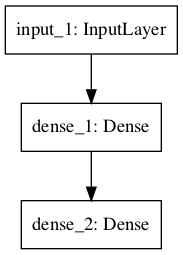

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
plot_model(autoencoder, dpi=96, to_file='model.png')
#model = model_to_dot(autoencoder).create(prog='dot', format='png')
#model.set_size('48x8')
#SVG(model)

### Train

In [19]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0453 - val_loss: 0.0228
Epoch 2/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0175 - val_loss: 0.0129
Epoch 3/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0108 - val_loss: 0.0087
Epoch 4/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0078 - val_loss: 0.0065
Epoch 5/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0062 - val_loss: 0.0055


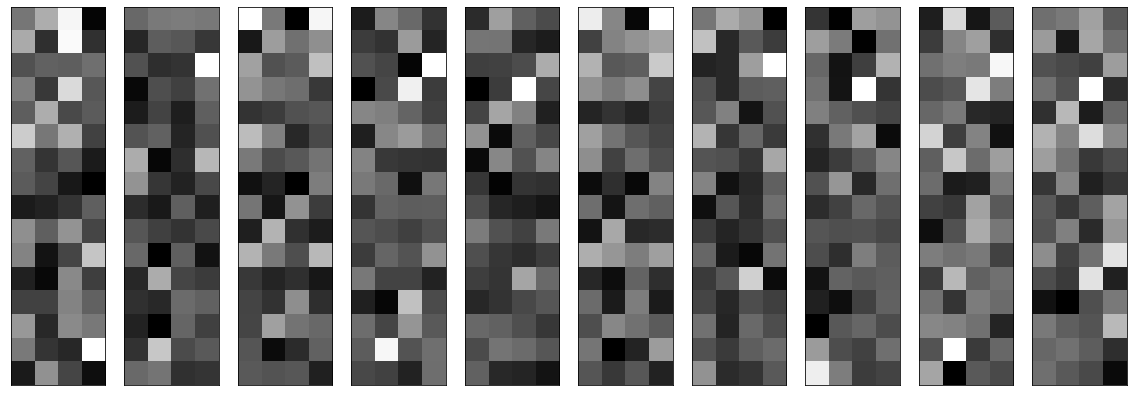

In [23]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Predict on the test set

In [21]:
decoded_imgs = autoencoder.predict(X_test)

### Plot

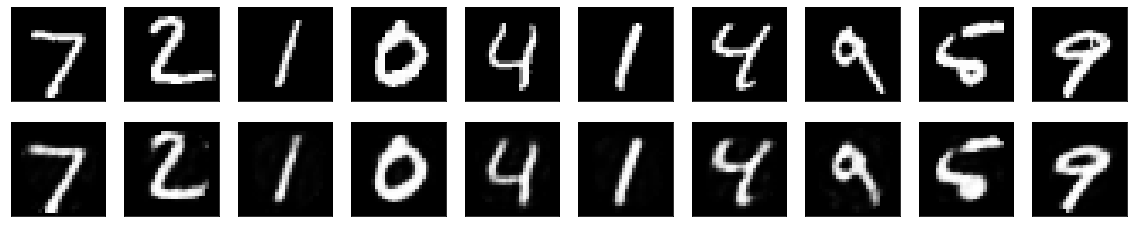

In [24]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['val_loss', 'loss'])


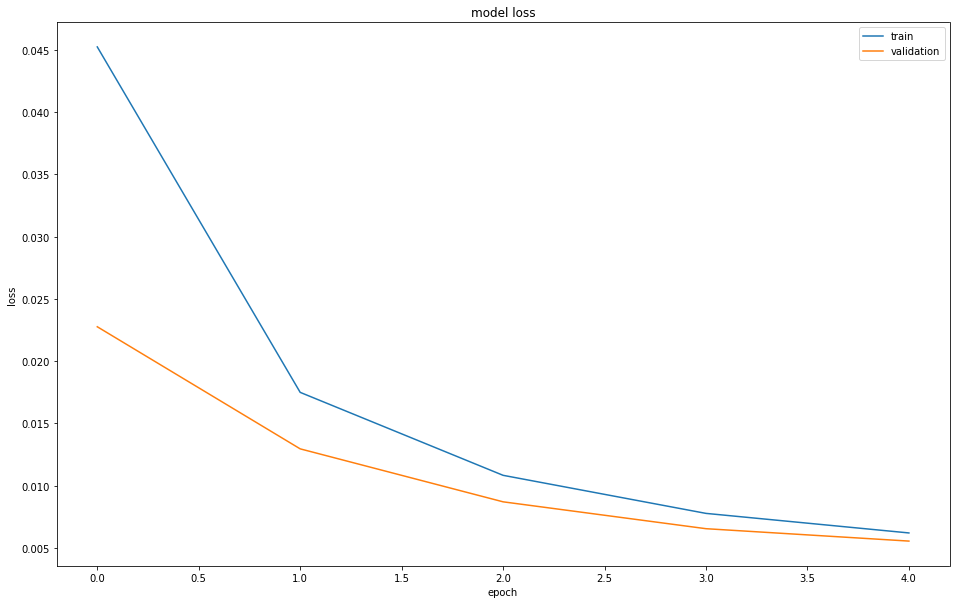

In [25]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

---

# **Multilayer autoencoder**

### Create the network

We extend the idea of the first network to more layers

In [26]:
input_size = 784
hidden_size = 128
code_size = 64

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

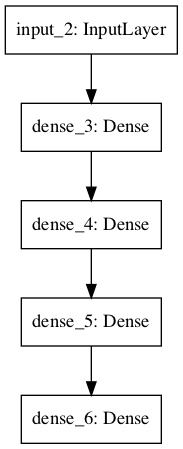

In [28]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
plot_model(autoencoder, dpi=96, to_file='model.png')
#SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

### Train the network

In [29]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.0413 - val_loss: 0.0194
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.0161 - val_loss: 0.0131
Epoch 3/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0122 - val_loss: 0.0107
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0104 - val_loss: 0.0094
Epoch 5/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0093 - val_loss: 0.0085


### Predict on the test set

In [30]:
decoded_imgs = autoencoder.predict(X_test)

### Plot

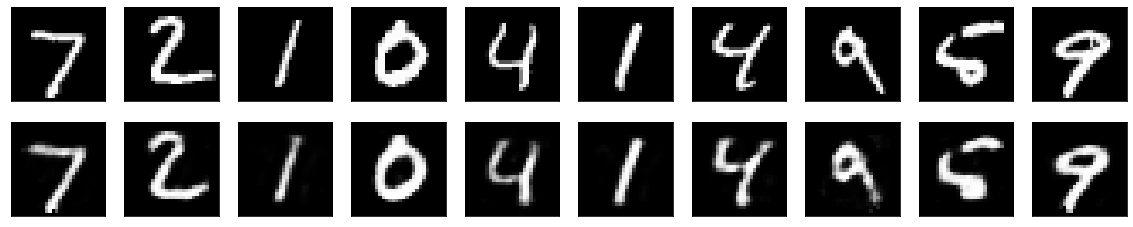

In [31]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['val_loss', 'loss'])


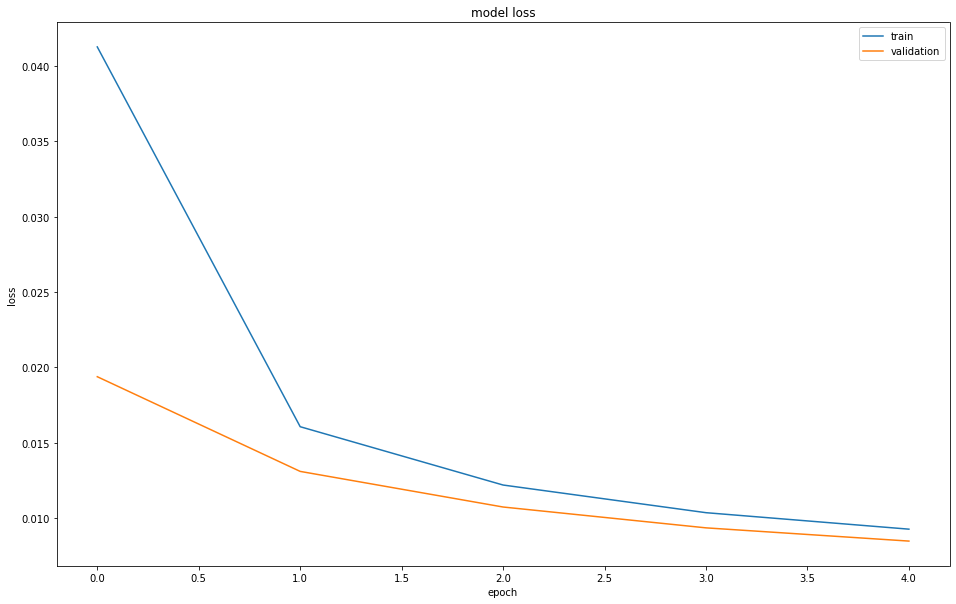

In [33]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

___

# **Convolutional autoencoder**

In [34]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Create the network

This network does not take flattened vectors as an input but images

In [35]:
x = Input(shape=(28, 28,1)) 

# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder use transpose CONV
# https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


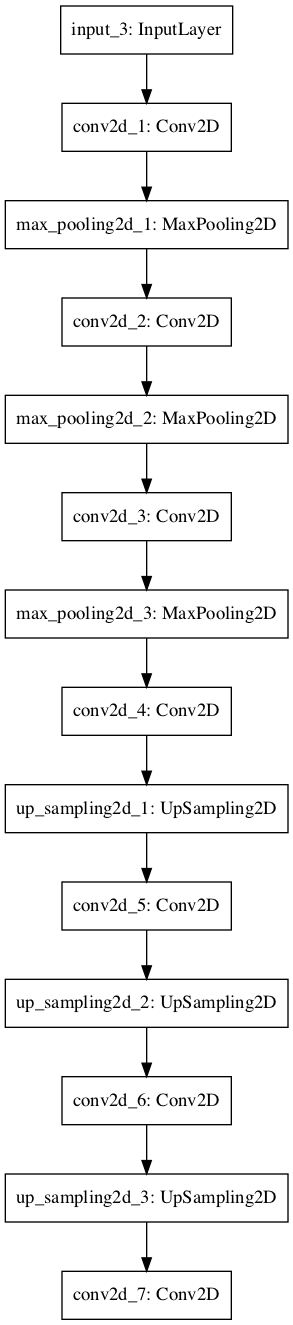

In [36]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
plot_model(autoencoder, dpi=96, to_file='model.png')
#SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

### Train

In [37]:
epochs = 3
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 55s 915us/step - loss: 0.2098 - val_loss: 0.1600
Epoch 2/3
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1551 - val_loss: 0.1495
Epoch 3/3
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1417 - val_loss: 0.1362


In [39]:
decoded_imgs = autoencoder.predict(X_test)

### Plot

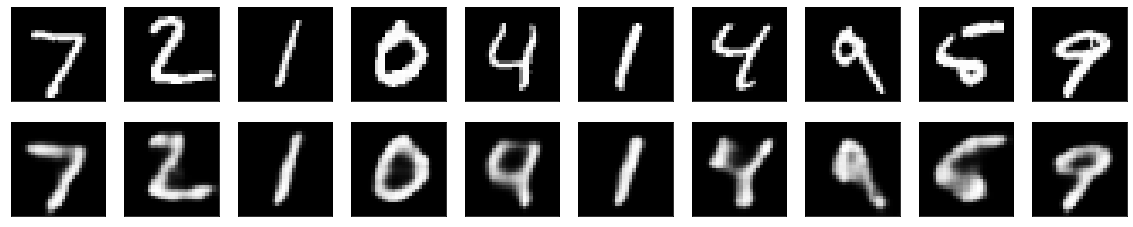

In [40]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['val_loss', 'loss'])


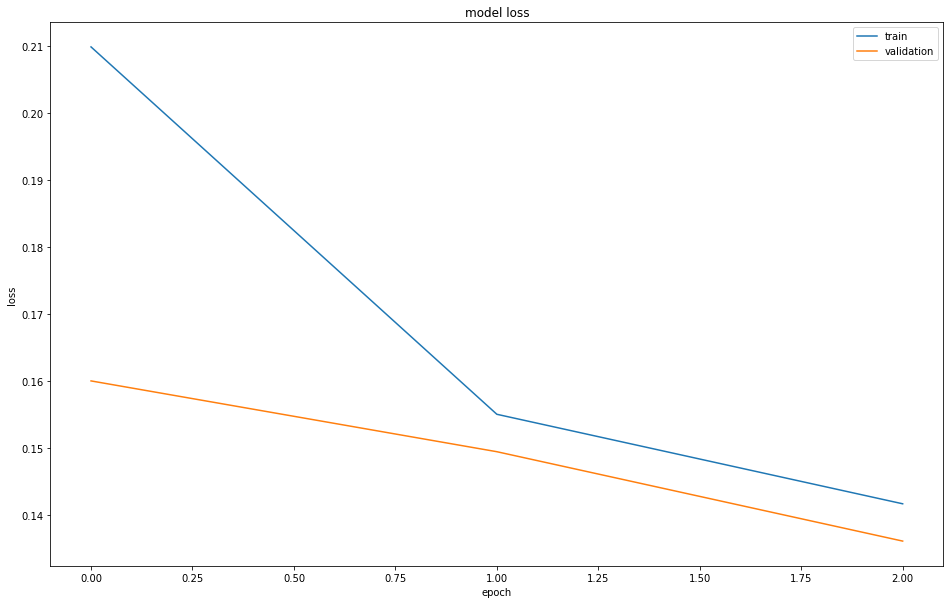

In [41]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

___

# **Regularized autoencoder**

Two types of regularization are described : 
- Sparse autoencoder
- Denoising autoencoder

In [52]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 1. Sparse autoencoder

### Create the network

In [48]:
input_size = 784
hidden_size = 32
output_size = 784

In [49]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

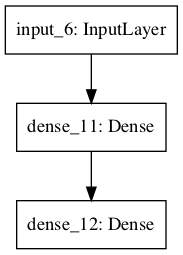

In [50]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
plot_model(autoencoder, dpi=96, to_file='model.png')
#SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [53]:
epochs = 15
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 43us/step - loss: 0.1950 - val_loss: 0.1634
Epoch 2/15
60000/60000 [==============================] - 2s 28us/step - loss: 0.1417 - val_loss: 0.1243
Epoch 3/15
60000/60000 [==============================] - 2s 28us/step - loss: 0.1121 - val_loss: 0.1025
Epoch 4/15
60000/60000 [==============================] - 2s 29us/step - loss: 0.0954 - val_loss: 0.0901
Epoch 5/15
60000/60000 [==============================] - 2s 29us/step - loss: 0.0857 - val_loss: 0.0826
Epoch 6/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.0798 - val_loss: 0.0780
Epoch 7/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.0761 - val_loss: 0.0749
Epoch 8/15
60000/60000 [==============================] - 2s 28us/step - loss: 0.0736 - val_loss: 0.0729
Epoch 9/15
60000/60000 [==============================] - 2s 28us/step - loss: 0.0718 - val_loss: 0.0714
Epoch

### Predict on the test set

In [55]:
decoded_imgs = autoencoder.predict(X_test)

### Plot

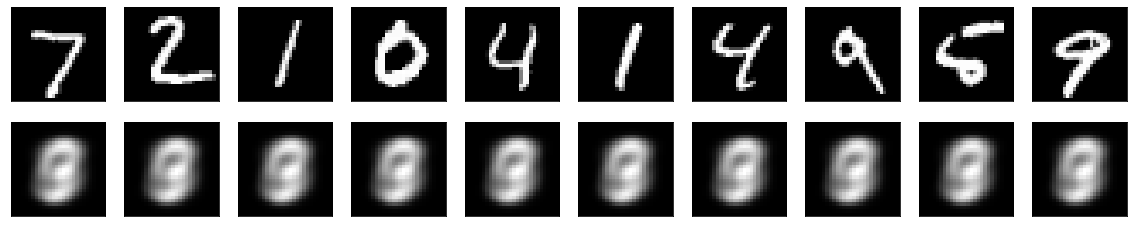

In [56]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['val_loss', 'loss'])


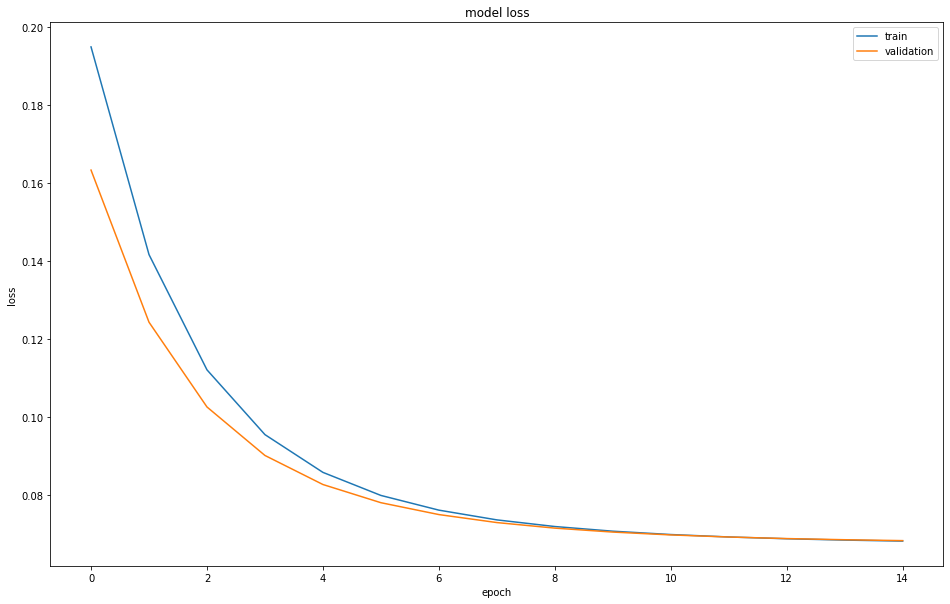

In [57]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## 2. Denoising autoencoder

In [6]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

### Create gaussian noisy data

In [7]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

### Create the network

In [105]:
x = Input(shape=(28, 28, 1))

# Encoder
conv1_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
h = MaxPooling2D((2, 2), padding='same')(conv1_2)


# Decoder
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

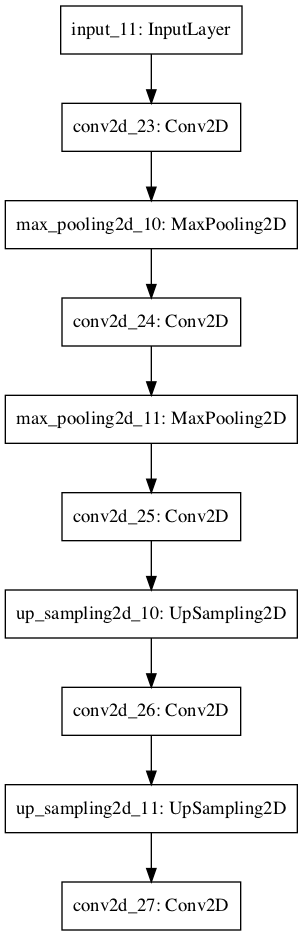

In [106]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
plot_model(autoencoder, dpi=96, to_file='model.png')
#SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

### Train the network

In [107]:
epochs = 3
batch_size = 128

history = autoencoder.fit(X_train_noisy, X_train_noisy, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_noisy, X_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 161s 3ms/step - loss: 0.5274 - val_loss: 0.5042
Epoch 2/3
60000/60000 [==============================] - 177s 3ms/step - loss: 0.4967 - val_loss: 0.4903
Epoch 3/3
60000/60000 [==============================] - 154s 3ms/step - loss: 0.4880 - val_loss: 0.4851


In [108]:
decoded_imgs = autoencoder.predict(X_test_noisy)

### Plot

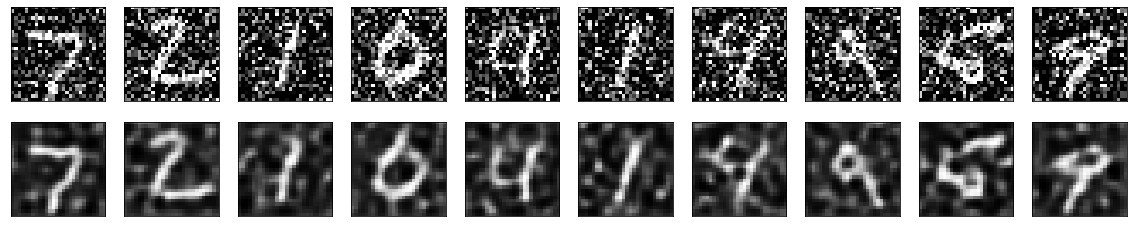

In [109]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### Plot the losses

dict_keys(['val_loss', 'loss'])


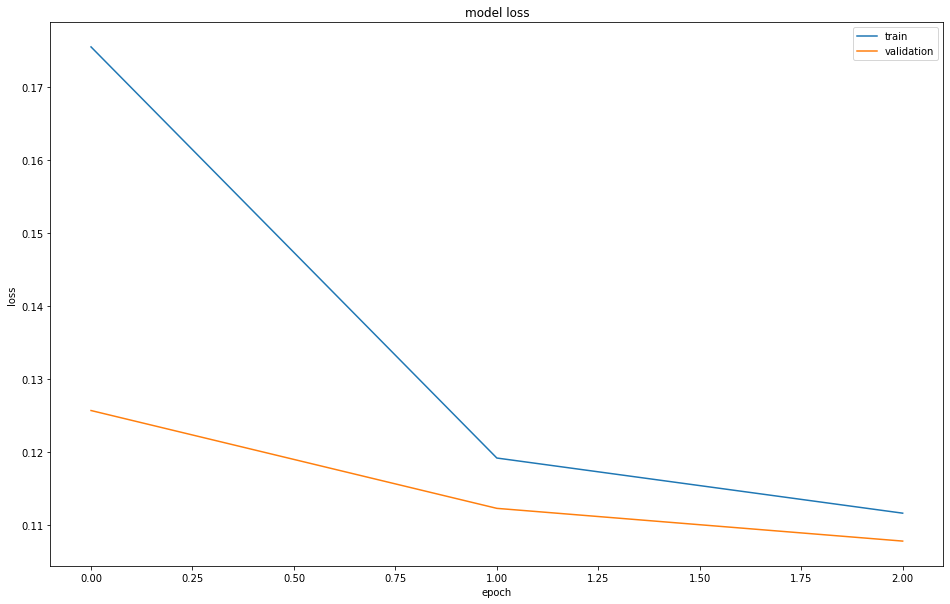

In [69]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

<h2> Add Salt and Pepper Noise

In [72]:
from skimage.util.noise import random_noise

In [82]:
noise_factor = 0.5
X_train_noisy = random_noise(X_train, mode='s&p', clip=True, amount = 0.15)
X_test_noisy = random_noise(X_test, mode='s&p', clip=True, amount = 0.15)

In [74]:
X_train_noisy.shape

(60000, 28, 28, 1)

In [99]:
x = Input(shape=(28, 28, 1))

# Encoder
conv1_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
h = MaxPooling2D((2, 2), padding='same')(conv1_2)


# Decoder
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [100]:
epochs = 3
batch_size = 128

history = autoencoder.fit(X_train_noisy, X_train_noisy, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_noisy, X_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 111s 2ms/step - loss: 0.3266 - val_loss: 0.2793
Epoch 2/3
60000/60000 [==============================] - 134s 2ms/step - loss: 0.2668 - val_loss: 0.2563
Epoch 3/3
60000/60000 [==============================] - 138s 2ms/step - loss: 0.2408 - val_loss: 0.2227


In [101]:
decoded_imgs = autoencoder.predict(X_test_noisy)

<h3> Tran with s$\&$p = 0.05 Test with s$\&$p = 0.15, still work 

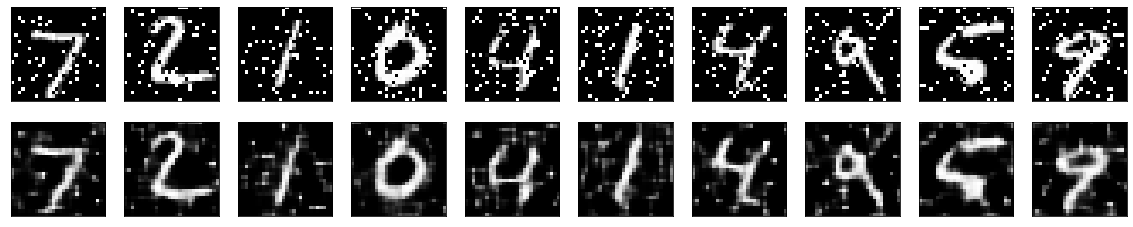

In [102]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

<h3> Train with vanilla structure

In [8]:
X_train_noise_1d = X_train_noisy.reshape((len(X_train_noisy), np.prod(X_train_noisy.shape[1:])))
X_test_noise_1d = X_test_noisy.reshape((len(X_test_noisy), np.prod(X_test_noisy.shape[1:])))
X_train_1d = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test_1d = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [9]:
input_size = 784
hidden_size = 128
code_size = 64

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
epochs = 50
batch_size = 128

history = autoencoder.fit(X_train_noise_1d, X_train_noise_1d, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_noise_1d, X_test_noise_1d))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.0820 - val_loss: 0.0818
Epoch 2/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.0818 - val_loss: 0.0816
Epoch 3/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.0817 - val_loss: 0.0816
Epoch 4/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.0816 - val_loss: 0.0814
Epoch 5/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.0815 - val_loss: 0.0814
Epoch 6/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.0815 - val_loss: 0.0814
Epoch 7/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0814 - val_loss: 0.0813
Epoch 8/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.0813 - val_loss: 0.0812
Epoch 9/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.0812 - val_loss: 0.0811
Epoch

In [16]:
decoded_imgs = autoencoder.predict(X_test_noise_1d)

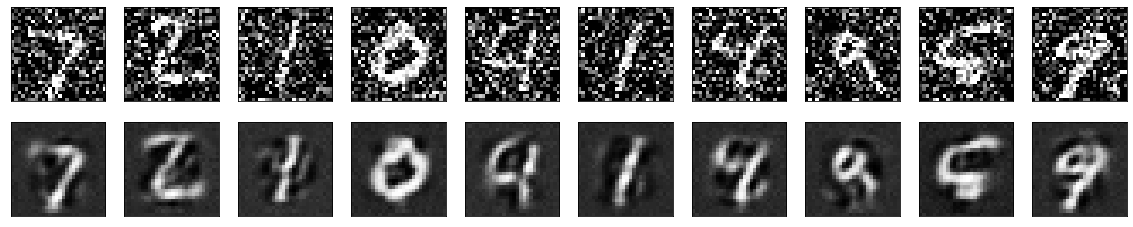

In [17]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

___

---